In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Install  UMAP and MAGIC for comparison
!pip install umap-learn magic-impute
!pip install scprep umap-learn magic-impute
#you need to install s_gd2 https://github.com/jxz12/s_gd2 #this is version (s-gd2==1.7) is stable
!pip install s-gd2==1.7
import requests
import os
import urllib.request
url_sc_phenix = 'https://raw.githubusercontent.com/resendislab/sc-PHENIX/main/sc-PHENIX%20tutorial%20colab/sc_PHENIX.py'
urllib.request.urlretrieve(url_sc_phenix, 'sc_PHENIX.py')
os.listdir()
!cd /content
!ls






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for s-gd2: filename=s_gd2-1.7-cp310-cp310-linux_x86_64.whl size=537554 sha256=29edd63c2192db640d5dea29ff5ac485f485e7d7e6d493253b4be5c6a0486717
  Stored in directory: /root/.cache/pip/wheels/01/22/1b/8ad6ccdf7a37dbdd2a19afd4958d3b00516c88de69e5860f2d
Successfully built s-gd2
drive  sample_data  sc_PHENIX.py


# Data

In [3]:
import pandas as pd
import umap
import scprep
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Datos originales de microarreglos del desarrollo de C. Elegans

TrueEXpre = scprep.io.load_csv('/content/drive/MyDrive/Cristian Padrón/viernes 30 de oct/Supplementary_table_1.csv',cell_axis= 'row')
TrueEXpre = np.exp(TrueEXpre)

TrueEXpre = TrueEXpre.T

In [4]:
import pandas as pd
import numpy as np

def insertar_ceros_aleatorios(df, porcentaje=10, semilla=42):
    """
    Inserta ceros de manera aleatoria en un DataFrame basado en un porcentaje especificado y es reproducible por una semilla.

    Parámetros:
    df (pd.DataFrame): DataFrame original.
    porcentaje (int, opcional): Porcentaje de ceros a insertar. Por defecto es 10%.
    semilla (int, opcional): Semilla para el generador de números aleatorios. Por defecto es 42.

    Retorna:
    pd.DataFrame: DataFrame con ceros insertados aleatoriamente y reproducibilidad garantizada.
    """
    # Fijar la semilla del generador de números aleatorios para reproducibilidad
    np.random.seed(semilla)

    # Calcular el número total de elementos en el DataFrame
    total_elementos = df.size

    # Calcular el número de elementos a cambiar a cero
    num_ceros = int(total_elementos * (porcentaje / 100))

    # Generar pares de índices únicos
    indices = np.random.choice(total_elementos, num_ceros, replace=False)
    indices_fila = indices // df.shape[1]
    indices_columna = indices % df.shape[1]

    # Crear una copia del DataFrame para modificar
    df_modificado = df.copy()

    # Insertar ceros en los índices seleccionados
    df_modificado.values[indices_fila, indices_columna] = 0

    return df_modificado


In [ ]:
#dropout = insertar_ceros_aleatorios(TrueEXpre,porcentaje=60,  semilla=62)

# run_analysis(real=TrueEXpre, porcentaje=80, seed=62, t=5, knn=5, decay=5, npca_range=range(1, 200)



```python
import magic

magic_operator = magic.MAGIC(n_pca=param_value, t=t, knn=knn, decay=decay, random_state=1)
imputed_magic = magic_operator.fit_transform(dropout)

from sc_PHENIX import run_pca, sc_PHENIX

pca_data = run_pca(dropout, n_components=param_value, random_state=1)
umap_fit = umap.UMAP(n_components=30,n_epochs=3000,n_neighbors=220,negative_sample_rate=100,metric='cosine', random_state=1)
imputed_phenix = sc_PHENIX(dropout, u_no_3, t=t, knn=knn, decay=decay)


Processing PCA Components:   0%|          | 0/199 [00:00<?, ?it/s]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.29 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.33 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 0.45 seconds.
process start Fri May 17 21:09:59 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:10:56 2024


Processing PCA Components:   1%|          | 1/199 [01:00<3:18:58, 60.30s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.27 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.31 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.42 seconds.
process start Fri May 17 21:10:59 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:02 2024


Processing PCA Components:   1%|          | 2/199 [01:06<1:32:54, 28.30s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.23 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.27 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.36 seconds.
process start Fri May 17 21:11:05 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:09 2024


Processing PCA Components:   2%|▏         | 3/199 [01:12<1:00:12, 18.43s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.43 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.49 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 0.62 seconds.
process start Fri May 17 21:11:12 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:16 2024


Processing PCA Components:   2%|▏         | 4/199 [01:19<44:31, 13.70s/it]  

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.23 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.28 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.38 seconds.
process start Fri May 17 21:11:18 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:21 2024


Processing PCA Components:   3%|▎         | 5/199 [01:25<35:15, 10.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 0.74 seconds.
process start Fri May 17 21:11:25 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:29 2024


Processing PCA Components:   3%|▎         | 6/199 [01:32<31:17,  9.73s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.29 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.35 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.44 seconds.
process start Fri May 17 21:11:32 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:35 2024


Processing PCA Components:   4%|▎         | 7/199 [01:38<27:02,  8.45s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.45 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.50 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.59 seconds.
process start Fri May 17 21:11:38 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:43 2024


Processing PCA Components:   4%|▍         | 8/199 [01:46<26:23,  8.29s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.46 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.52 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.61 seconds.
process start Fri May 17 21:11:46 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:49 2024


Processing PCA Components:   5%|▍         | 9/199 [01:52<24:16,  7.66s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.40 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.45 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.55 seconds.
process start Fri May 17 21:11:52 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:11:56 2024


Processing PCA Components:   5%|▌         | 10/199 [01:59<23:35,  7.49s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.61 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.78 seconds.
process start Fri May 17 21:11:59 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:03 2024


Processing PCA Components:   6%|▌         | 11/199 [02:06<22:33,  7.20s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.49 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.54 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.65 seconds.
process start Fri May 17 21:12:06 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:10 2024


Processing PCA Components:   6%|▌         | 12/199 [02:14<22:48,  7.32s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.80 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.12 seconds.
Calculated MAGIC in 0.96 seconds.
process start Fri May 17 21:12:14 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:19 2024


Processing PCA Components:   7%|▋         | 13/199 [02:22<23:56,  7.72s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.50 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.55 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.64 seconds.
process start Fri May 17 21:12:22 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:26 2024


Processing PCA Components:   7%|▋         | 14/199 [02:30<23:27,  7.61s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.87 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.07 seconds.
process start Fri May 17 21:12:30 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:35 2024


Processing PCA Components:   8%|▊         | 15/199 [02:39<24:42,  8.06s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.48 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.52 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.64 seconds.
process start Fri May 17 21:12:38 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:42 2024


Processing PCA Components:   8%|▊         | 16/199 [02:45<23:21,  7.66s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.06 seconds.
process start Fri May 17 21:12:46 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:50 2024


Processing PCA Components:   9%|▊         | 17/199 [02:53<23:18,  7.68s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.70 seconds.
process start Fri May 17 21:12:53 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:12:57 2024


Processing PCA Components:   9%|▉         | 18/199 [03:00<22:37,  7.50s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.99 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.08 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.21 seconds.
process start Fri May 17 21:13:01 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:05 2024


Processing PCA Components:  10%|▉         | 19/199 [03:08<22:55,  7.64s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.77 seconds.
process start Fri May 17 21:13:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:11 2024


Processing PCA Components:  10%|█         | 20/199 [03:15<21:47,  7.30s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 0.84 seconds.
process start Fri May 17 21:13:15 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:19 2024


Processing PCA Components:  11%|█         | 21/199 [03:22<22:07,  7.46s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.43 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.53 seconds.
process start Fri May 17 21:13:22 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:25 2024


Processing PCA Components:  11%|█         | 22/199 [03:28<20:44,  7.03s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.36 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.49 seconds.
process start Fri May 17 21:13:28 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:33 2024


Processing PCA Components:  12%|█▏        | 23/199 [03:36<21:20,  7.28s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.41 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.56 seconds.
process start Fri May 17 21:13:36 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:39 2024


Processing PCA Components:  12%|█▏        | 24/199 [03:43<20:18,  6.97s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.40 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.57 seconds.
process start Fri May 17 21:13:42 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:46 2024


Processing PCA Components:  13%|█▎        | 25/199 [03:50<20:22,  7.02s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.69 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.78 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 0.92 seconds.
process start Fri May 17 21:13:50 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:13:53 2024


Processing PCA Components:  13%|█▎        | 26/199 [03:56<19:55,  6.91s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.52 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.68 seconds.
process start Fri May 17 21:13:56 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:00 2024


Processing PCA Components:  14%|█▎        | 27/199 [04:03<19:44,  6.89s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.79 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 0.92 seconds.
process start Fri May 17 21:14:03 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:07 2024


Processing PCA Components:  14%|█▍        | 28/199 [04:11<20:09,  7.07s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.50 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.55 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.66 seconds.
process start Fri May 17 21:14:10 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:14 2024


Processing PCA Components:  15%|█▍        | 29/199 [04:18<19:49,  7.00s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.85 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.01 seconds.
process start Fri May 17 21:14:18 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:22 2024


Processing PCA Components:  15%|█▌        | 30/199 [04:25<20:02,  7.12s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.68 seconds.
process start Fri May 17 21:14:25 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:28 2024


Processing PCA Components:  16%|█▌        | 31/199 [04:31<19:19,  6.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.87 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.94 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.08 seconds.
process start Fri May 17 21:14:32 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:36 2024


Processing PCA Components:  16%|█▌        | 32/199 [04:39<20:05,  7.22s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.71 seconds.
process start Fri May 17 21:14:39 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:43 2024


Processing PCA Components:  17%|█▋        | 33/199 [04:46<19:16,  6.96s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.73 seconds.
process start Fri May 17 21:14:46 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:51 2024


Processing PCA Components:  17%|█▋        | 34/199 [04:54<20:17,  7.38s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.57 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.64 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.73 seconds.
process start Fri May 17 21:14:54 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:14:57 2024


Processing PCA Components:  18%|█▊        | 35/199 [05:00<19:19,  7.07s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.73 seconds.
process start Fri May 17 21:15:00 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:05 2024


Processing PCA Components:  18%|█▊        | 36/199 [05:08<19:40,  7.24s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.51 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.59 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.68 seconds.
process start Fri May 17 21:15:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:11 2024


Processing PCA Components:  19%|█▊        | 37/199 [05:14<18:51,  6.98s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.49 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.56 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.65 seconds.
process start Fri May 17 21:15:14 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:19 2024


Processing PCA Components:  19%|█▉        | 38/199 [05:22<19:15,  7.18s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.77 seconds.
process start Fri May 17 21:15:22 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:26 2024


Processing PCA Components:  20%|█▉        | 39/199 [05:29<18:57,  7.11s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.57 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.73 seconds.
process start Fri May 17 21:15:29 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:33 2024


Processing PCA Components:  20%|██        | 40/199 [05:36<19:07,  7.22s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.82 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.92 seconds.
process start Fri May 17 21:15:36 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:40 2024


Processing PCA Components:  21%|██        | 41/199 [05:43<18:32,  7.04s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.72 seconds.
process start Fri May 17 21:15:43 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:47 2024


Processing PCA Components:  21%|██        | 42/199 [05:50<18:26,  7.05s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.02 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.16 seconds.
process start Fri May 17 21:15:51 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:15:54 2024


Processing PCA Components:  22%|██▏       | 43/199 [05:57<18:31,  7.13s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.66 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.76 seconds.
process start Fri May 17 21:15:57 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:01 2024


Processing PCA Components:  22%|██▏       | 44/199 [06:05<18:36,  7.21s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.04 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.09 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.22 seconds.
process start Fri May 17 21:16:05 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:11 2024


Processing PCA Components:  23%|██▎       | 45/199 [06:14<19:49,  7.73s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.59 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.75 seconds.
process start Fri May 17 21:16:13 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:17 2024


Processing PCA Components:  23%|██▎       | 46/199 [06:21<18:58,  7.44s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.18 seconds.
process start Fri May 17 21:16:21 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:25 2024


Processing PCA Components:  24%|██▎       | 47/199 [06:29<19:19,  7.63s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.81 seconds.
process start Fri May 17 21:16:28 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:32 2024


Processing PCA Components:  24%|██▍       | 48/199 [06:35<18:26,  7.32s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.03 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.12 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.25 seconds.
process start Fri May 17 21:16:36 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:41 2024


Processing PCA Components:  25%|██▍       | 49/199 [06:44<19:23,  7.75s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.69 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.79 seconds.
process start Fri May 17 21:16:44 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:47 2024


Processing PCA Components:  25%|██▌       | 50/199 [06:51<18:30,  7.45s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.12 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.26 seconds.
process start Fri May 17 21:16:51 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:16:56 2024


Processing PCA Components:  26%|██▌       | 51/199 [06:59<18:55,  7.67s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.10 seconds.
process start Fri May 17 21:16:59 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:04 2024


Processing PCA Components:  26%|██▌       | 52/199 [07:07<19:21,  7.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.06 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.14 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.28 seconds.
process start Fri May 17 21:17:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:12 2024


Processing PCA Components:  27%|██▋       | 53/199 [07:16<19:29,  8.01s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.69 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.80 seconds.
process start Fri May 17 21:17:15 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:19 2024


Processing PCA Components:  27%|██▋       | 54/199 [07:22<18:26,  7.63s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.15 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.29 seconds.
process start Fri May 17 21:17:23 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:28 2024


Processing PCA Components:  28%|██▊       | 55/199 [07:31<19:21,  8.07s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.82 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.92 seconds.
process start Fri May 17 21:17:31 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:35 2024


Processing PCA Components:  28%|██▊       | 56/199 [07:39<18:35,  7.80s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.31 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.46 seconds.
process start Fri May 17 21:17:39 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:44 2024


Processing PCA Components:  29%|██▊       | 57/199 [07:47<18:49,  7.96s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.68 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.76 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.87 seconds.
process start Fri May 17 21:17:47 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:51 2024


Processing PCA Components:  29%|██▉       | 58/199 [07:54<18:06,  7.71s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.20 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.33 seconds.
process start Fri May 17 21:17:55 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:17:59 2024


Processing PCA Components:  30%|██▉       | 59/199 [08:02<18:15,  7.82s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.97 seconds.
process start Fri May 17 21:18:02 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:06 2024


Processing PCA Components:  30%|███       | 60/199 [08:10<18:05,  7.81s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.41 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.55 seconds.
process start Fri May 17 21:18:11 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:15 2024


Processing PCA Components:  31%|███       | 61/199 [08:18<18:17,  7.96s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.82 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.93 seconds.
process start Fri May 17 21:18:18 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:22 2024


Processing PCA Components:  31%|███       | 62/199 [08:26<17:42,  7.75s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.21 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.28 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.42 seconds.
process start Fri May 17 21:18:26 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:30 2024


Processing PCA Components:  32%|███▏      | 63/199 [08:33<17:43,  7.82s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.02 seconds.
process start Fri May 17 21:18:33 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:37 2024


Processing PCA Components:  32%|███▏      | 64/199 [08:41<17:21,  7.71s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.35 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.50 seconds.
process start Fri May 17 21:18:42 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:46 2024


Processing PCA Components:  33%|███▎      | 65/199 [08:49<17:46,  7.96s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.89 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.02 seconds.
process start Fri May 17 21:18:49 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:18:54 2024


Processing PCA Components:  33%|███▎      | 66/199 [08:57<17:24,  7.85s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.34 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.46 seconds.
process start Fri May 17 21:18:58 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:02 2024


Processing PCA Components:  34%|███▎      | 67/199 [09:05<17:22,  7.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.03 seconds.
process start Fri May 17 21:19:05 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:09 2024


Processing PCA Components:  34%|███▍      | 68/199 [09:13<17:05,  7.83s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.31 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.45 seconds.
process start Fri May 17 21:19:14 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:18 2024


Processing PCA Components:  35%|███▍      | 69/199 [09:21<17:02,  7.86s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.03 seconds.
process start Fri May 17 21:19:21 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:25 2024


Processing PCA Components:  35%|███▌      | 70/199 [09:29<17:07,  7.97s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.35 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.42 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.55 seconds.
process start Fri May 17 21:19:30 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:33 2024


Processing PCA Components:  36%|███▌      | 71/199 [09:37<16:51,  7.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.90 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.09 seconds.
process start Fri May 17 21:19:37 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:41 2024


Processing PCA Components:  36%|███▌      | 72/199 [09:45<16:41,  7.88s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.37 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.60 seconds.
process start Fri May 17 21:19:45 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:49 2024


Processing PCA Components:  37%|███▋      | 73/199 [09:52<16:29,  7.85s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.03 seconds.
process start Fri May 17 21:19:52 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:19:57 2024


Processing PCA Components:  37%|███▋      | 74/199 [10:00<16:19,  7.83s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.39 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.48 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.61 seconds.
process start Fri May 17 21:20:01 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:05 2024


Processing PCA Components:  38%|███▊      | 75/199 [10:08<16:27,  7.97s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.09 seconds.
process start Fri May 17 21:20:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:13 2024


Processing PCA Components:  38%|███▊      | 76/199 [10:17<16:31,  8.06s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.91 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.10 seconds.
process start Fri May 17 21:20:17 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:21 2024


Processing PCA Components:  39%|███▊      | 77/199 [10:24<15:54,  7.82s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.02 seconds.
process start Fri May 17 21:20:24 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:29 2024


Processing PCA Components:  39%|███▉      | 78/199 [10:32<16:09,  8.02s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.05 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.16 seconds.
process start Fri May 17 21:20:32 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:36 2024


Processing PCA Components:  40%|███▉      | 79/199 [10:40<15:35,  7.79s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.08 seconds.
process start Fri May 17 21:20:40 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:45 2024


Processing PCA Components:  40%|████      | 80/199 [10:48<15:57,  8.04s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.02 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.14 seconds.
process start Fri May 17 21:20:48 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:20:53 2024


Processing PCA Components:  41%|████      | 81/199 [10:56<15:40,  7.97s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.26 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.40 seconds.
process start Fri May 17 21:20:57 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:02 2024


Processing PCA Components:  41%|████      | 82/199 [11:05<16:09,  8.28s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.12 seconds.
process start Fri May 17 21:21:05 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:09 2024


Processing PCA Components:  42%|████▏     | 83/199 [11:13<15:32,  8.04s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.52 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.77 seconds.
process start Fri May 17 21:21:14 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:18 2024


Processing PCA Components:  42%|████▏     | 84/199 [11:22<16:02,  8.37s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.09 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.21 seconds.
process start Fri May 17 21:21:22 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:26 2024


Processing PCA Components:  43%|████▎     | 85/199 [11:30<15:39,  8.24s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.69 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.84 seconds.
process start Fri May 17 21:21:31 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:35 2024


Processing PCA Components:  43%|████▎     | 86/199 [11:38<15:51,  8.42s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.03 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.13 seconds.
process start Fri May 17 21:21:39 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:43 2024


Processing PCA Components:  44%|████▎     | 87/199 [11:47<15:31,  8.32s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.82 seconds.
process start Fri May 17 21:21:47 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:21:51 2024


Processing PCA Components:  44%|████▍     | 88/199 [11:55<15:15,  8.25s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.08 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.19 seconds.
process start Fri May 17 21:21:55 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:00 2024


Processing PCA Components:  45%|████▍     | 89/199 [12:03<15:17,  8.34s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.35 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.47 seconds.
process start Fri May 17 21:22:04 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:08 2024


Processing PCA Components:  45%|████▌     | 90/199 [12:11<14:49,  8.16s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.09 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.20 seconds.
process start Fri May 17 21:22:11 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:17 2024


Processing PCA Components:  46%|████▌     | 91/199 [12:20<15:17,  8.50s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.17 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.28 seconds.
process start Fri May 17 21:22:20 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:25 2024


Processing PCA Components:  46%|████▌     | 92/199 [12:28<14:38,  8.21s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.22 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.34 seconds.
process start Fri May 17 21:22:28 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:34 2024


Processing PCA Components:  47%|████▋     | 93/199 [12:37<15:07,  8.56s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.03 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.08 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.19 seconds.
process start Fri May 17 21:22:37 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:41 2024


Processing PCA Components:  47%|████▋     | 94/199 [12:45<14:29,  8.29s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.81 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 2.05 seconds.
process start Fri May 17 21:22:46 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:51 2024


Processing PCA Components:  48%|████▊     | 95/199 [12:54<14:59,  8.65s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.26 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.37 seconds.
process start Fri May 17 21:22:55 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:22:59 2024


Processing PCA Components:  48%|████▊     | 96/199 [13:03<14:38,  8.53s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.05 seconds.
process start Fri May 17 21:23:04 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:23:09 2024


Processing PCA Components:  49%|████▊     | 97/199 [13:12<14:53,  8.76s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.13 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.23 seconds.
process start Fri May 17 21:23:12 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:23:17 2024


Processing PCA Components:  49%|████▉     | 98/199 [13:21<14:42,  8.73s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.39 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.56 seconds.
process start Fri May 17 21:23:21 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:23:25 2024


Processing PCA Components:  50%|████▉     | 99/199 [13:28<14:11,  8.51s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.25 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.36 seconds.
process start Fri May 17 21:23:29 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:23:34 2024


Processing PCA Components:  50%|█████     | 100/199 [13:38<14:19,  8.69s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.14 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.21 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.31 seconds.
process start Fri May 17 21:23:38 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:23:42 2024


Processing PCA Components:  51%|█████     | 101/199 [13:45<13:39,  8.36s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.18 seconds.
process start Fri May 17 21:23:46 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:23:52 2024


Processing PCA Components:  51%|█████▏    | 102/199 [13:55<14:14,  8.81s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.25 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.35 seconds.
process start Fri May 17 21:23:55 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:00 2024


Processing PCA Components:  52%|█████▏    | 103/199 [14:03<13:39,  8.54s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.81 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.95 seconds.
process start Fri May 17 21:24:04 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:09 2024


Processing PCA Components:  52%|█████▏    | 104/199 [14:12<13:57,  8.82s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.28 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.38 seconds.
process start Fri May 17 21:24:13 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:17 2024


Processing PCA Components:  53%|█████▎    | 105/199 [14:21<13:37,  8.70s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 2.12 seconds.
process start Fri May 17 21:24:22 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:26 2024


Processing PCA Components:  53%|█████▎    | 106/199 [14:30<13:32,  8.74s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.21 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.26 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.37 seconds.
process start Fri May 17 21:24:30 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:36 2024


Processing PCA Components:  54%|█████▍    | 107/199 [14:39<13:42,  8.94s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.27 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.34 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.44 seconds.
process start Fri May 17 21:24:39 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:44 2024


Processing PCA Components:  54%|█████▍    | 108/199 [14:47<13:06,  8.64s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.30 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.41 seconds.
process start Fri May 17 21:24:48 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:24:53 2024


Processing PCA Components:  55%|█████▍    | 109/199 [14:57<13:20,  8.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.27 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.37 seconds.
process start Fri May 17 21:24:57 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:25:01 2024


Processing PCA Components:  55%|█████▌    | 110/199 [15:04<12:46,  8.61s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.18 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.30 seconds.
process start Fri May 17 21:25:06 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:25:11 2024


Processing PCA Components:  56%|█████▌    | 111/199 [15:14<13:08,  8.96s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.50 seconds.
process start Fri May 17 21:25:15 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:25:20 2024


Processing PCA Components:  56%|█████▋    | 112/199 [15:23<13:04,  9.02s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 2.17 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.29 seconds.
process start Fri May 17 21:25:25 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:25:29 2024


Processing PCA Components:  57%|█████▋    | 113/199 [15:32<12:49,  8.95s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.13 seconds.
Calculated MAGIC in 2.19 seconds.
process start Fri May 17 21:25:35 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:25:45 2024


Processing PCA Components:  57%|█████▋    | 114/199 [15:49<15:58, 11.27s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.39 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.49 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 2.69 seconds.
process start Fri May 17 21:25:53 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:26:03 2024


Processing PCA Components:  58%|█████▊    | 115/199 [16:07<18:45, 13.40s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.47 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.61 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.17 seconds.
Calculated MAGIC in 2.84 seconds.
process start Fri May 17 21:26:11 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:26:20 2024


Processing PCA Components:  58%|█████▊    | 116/199 [16:23<19:31, 14.12s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.40 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.51 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.65 seconds.
process start Fri May 17 21:26:24 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:26:30 2024


Processing PCA Components:  59%|█████▉    | 117/199 [16:34<17:50, 13.06s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.31 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.37 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.48 seconds.
process start Fri May 17 21:26:34 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:26:39 2024


Processing PCA Components:  59%|█████▉    | 118/199 [16:42<15:49, 11.72s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.14 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.27 seconds.
process start Fri May 17 21:26:44 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:26:48 2024


Processing PCA Components:  60%|█████▉    | 119/199 [16:51<14:33, 10.92s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.35 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.43 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.56 seconds.
process start Fri May 17 21:26:52 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:26:57 2024


Processing PCA Components:  60%|██████    | 120/199 [17:01<13:46, 10.46s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.45 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.57 seconds.
process start Fri May 17 21:27:01 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:27:06 2024


Processing PCA Components:  61%|██████    | 121/199 [17:09<12:41,  9.76s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.50 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.71 seconds.
process start Fri May 17 21:27:10 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:27:18 2024


Processing PCA Components:  61%|██████▏   | 122/199 [17:21<13:21, 10.41s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.59 seconds.
process start Fri May 17 21:27:21 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:27:26 2024


Processing PCA Components:  62%|██████▏   | 123/199 [17:29<12:33,  9.92s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.18 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.31 seconds.
process start Fri May 17 21:27:31 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:27:36 2024


Processing PCA Components:  62%|██████▏   | 124/199 [17:40<12:26,  9.96s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.45 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.51 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.63 seconds.
process start Fri May 17 21:27:40 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:27:45 2024


Processing PCA Components:  63%|██████▎   | 125/199 [17:49<11:55,  9.68s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.22 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.34 seconds.
process start Fri May 17 21:27:50 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:27:54 2024


Processing PCA Components:  63%|██████▎   | 126/199 [17:57<11:29,  9.45s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.36 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.44 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.54 seconds.
process start Fri May 17 21:27:58 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:28:04 2024


Processing PCA Components:  64%|██████▍   | 127/199 [18:08<11:34,  9.64s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.14 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.29 seconds.
process start Fri May 17 21:28:09 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:28:14 2024


Processing PCA Components:  64%|██████▍   | 128/199 [18:17<11:23,  9.63s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.15 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 2.29 seconds.
process start Fri May 17 21:28:19 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:28:23 2024


Processing PCA Components:  65%|██████▍   | 129/199 [18:27<11:11,  9.59s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.52 seconds.
process start Fri May 17 21:28:27 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:28:32 2024


Processing PCA Components:  65%|██████▌   | 130/199 [18:36<10:56,  9.52s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.50 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.70 seconds.
process start Fri May 17 21:28:37 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:28:41 2024


Processing PCA Components:  66%|██████▌   | 131/199 [18:45<10:26,  9.21s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.34 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.41 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.53 seconds.
process start Fri May 17 21:28:45 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:28:51 2024


Processing PCA Components:  66%|██████▋   | 132/199 [18:55<10:35,  9.48s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.45 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.53 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.64 seconds.
process start Fri May 17 21:28:55 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:00 2024


Processing PCA Components:  67%|██████▋   | 133/199 [19:04<10:18,  9.37s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.98 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.07 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.21 seconds.
process start Fri May 17 21:29:05 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:10 2024


Processing PCA Components:  67%|██████▋   | 134/199 [19:13<10:09,  9.38s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.64 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.75 seconds.
process start Fri May 17 21:29:14 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:19 2024


Processing PCA Components:  68%|██████▊   | 135/199 [19:23<10:02,  9.42s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.81 seconds.
process start Fri May 17 21:29:23 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:28 2024


Processing PCA Components:  68%|██████▊   | 136/199 [19:31<09:36,  9.15s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.46 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.52 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.63 seconds.
process start Fri May 17 21:29:32 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:38 2024


Processing PCA Components:  69%|██████▉   | 137/199 [19:41<09:46,  9.46s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.44 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.51 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.62 seconds.
process start Fri May 17 21:29:42 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:47 2024


Processing PCA Components:  69%|██████▉   | 138/199 [19:51<09:31,  9.37s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.31 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.39 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 2.53 seconds.
process start Fri May 17 21:29:52 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:29:57 2024


Processing PCA Components:  70%|██████▉   | 139/199 [20:00<09:26,  9.44s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.49 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.56 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.67 seconds.
process start Fri May 17 21:30:01 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:30:06 2024


Processing PCA Components:  70%|███████   | 140/199 [20:10<09:21,  9.52s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.74 seconds.
process start Fri May 17 21:30:10 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:30:15 2024


Processing PCA Components:  71%|███████   | 141/199 [20:18<08:54,  9.21s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.83 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.96 seconds.
process start Fri May 17 21:30:19 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:30:26 2024


Processing PCA Components:  71%|███████▏  | 142/199 [20:29<09:06,  9.58s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.76 seconds.
process start Fri May 17 21:30:29 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:30:35 2024


Processing PCA Components:  72%|███████▏  | 143/199 [20:38<08:55,  9.57s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.42 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.53 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.65 seconds.
process start Fri May 17 21:30:40 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:30:45 2024


Processing PCA Components:  72%|███████▏  | 144/199 [20:48<08:45,  9.55s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.81 seconds.
process start Fri May 17 21:30:49 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:30:55 2024


Processing PCA Components:  73%|███████▎  | 145/199 [20:58<08:46,  9.76s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.76 seconds.
process start Fri May 17 21:30:59 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:31:03 2024


Processing PCA Components:  73%|███████▎  | 146/199 [21:07<08:21,  9.46s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.31 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.42 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.57 seconds.
process start Fri May 17 21:31:09 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:31:14 2024


Processing PCA Components:  74%|███████▍  | 147/199 [21:17<08:23,  9.69s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.72 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.86 seconds.
process start Fri May 17 21:31:18 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:31:23 2024


Processing PCA Components:  74%|███████▍  | 148/199 [21:27<08:18,  9.77s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.71 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.83 seconds.
process start Fri May 17 21:31:28 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:31:33 2024


Processing PCA Components:  75%|███████▍  | 149/199 [21:36<07:59,  9.60s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.11 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.23 seconds.
process start Fri May 17 21:31:38 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:31:44 2024


Processing PCA Components:  75%|███████▌  | 150/199 [21:47<08:05,  9.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.80 seconds.
process start Fri May 17 21:31:48 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:31:53 2024


Processing PCA Components:  76%|███████▌  | 151/199 [21:56<07:46,  9.72s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.25 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.37 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.50 seconds.
process start Fri May 17 21:31:58 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:32:02 2024


Processing PCA Components:  76%|███████▋  | 152/199 [22:06<07:33,  9.65s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.82 seconds.
process start Fri May 17 21:32:06 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:32:12 2024


Processing PCA Components:  77%|███████▋  | 153/199 [22:16<07:29,  9.77s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.59 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.79 seconds.
process start Fri May 17 21:32:16 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:32:22 2024


Processing PCA Components:  77%|███████▋  | 154/199 [22:26<07:31, 10.03s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.74 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.85 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.99 seconds.
process start Fri May 17 21:32:29 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:32:33 2024


Processing PCA Components:  78%|███████▊  | 155/199 [22:37<07:26, 10.15s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.74 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.85 seconds.
process start Fri May 17 21:32:37 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:32:44 2024


Processing PCA Components:  78%|███████▊  | 156/199 [22:47<07:16, 10.16s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.68 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.75 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.88 seconds.
process start Fri May 17 21:32:48 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:32:53 2024


Processing PCA Components:  79%|███████▉  | 157/199 [22:56<06:49,  9.76s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.31 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.43 seconds.
process start Fri May 17 21:32:57 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:33:04 2024


Processing PCA Components:  79%|███████▉  | 158/199 [23:07<07:02, 10.31s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.67 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.76 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.88 seconds.
process start Fri May 17 21:33:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:33:14 2024


Processing PCA Components:  80%|███████▉  | 159/199 [23:18<06:55, 10.38s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.80 seconds.
process start Fri May 17 21:33:19 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:33:23 2024


Processing PCA Components:  80%|████████  | 160/199 [23:27<06:26,  9.90s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.06 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.18 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 2.33 seconds.
process start Fri May 17 21:33:28 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:33:34 2024


Processing PCA Components:  81%|████████  | 161/199 [23:37<06:25, 10.15s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.76 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.88 seconds.
process start Fri May 17 21:33:38 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:33:43 2024


Processing PCA Components:  81%|████████▏ | 162/199 [23:47<06:08,  9.95s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.47 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.60 seconds.
process start Fri May 17 21:33:48 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:33:53 2024


Processing PCA Components:  82%|████████▏ | 163/199 [23:56<05:54,  9.84s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.67 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.78 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.90 seconds.
process start Fri May 17 21:33:57 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:04 2024


Processing PCA Components:  82%|████████▏ | 164/199 [24:07<05:57, 10.20s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.84 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.96 seconds.
process start Fri May 17 21:34:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:12 2024


Processing PCA Components:  83%|████████▎ | 165/199 [24:16<05:26,  9.61s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.81 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.94 seconds.
process start Fri May 17 21:34:18 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:22 2024


Processing PCA Components:  83%|████████▎ | 166/199 [24:25<05:15,  9.55s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.86 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.99 seconds.
process start Fri May 17 21:34:26 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:30 2024


Processing PCA Components:  84%|████████▍ | 167/199 [24:34<04:59,  9.36s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.20 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.34 seconds.
process start Fri May 17 21:34:35 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:39 2024


Processing PCA Components:  84%|████████▍ | 168/199 [24:42<04:40,  9.05s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.99 seconds.
process start Fri May 17 21:34:43 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:49 2024


Processing PCA Components:  85%|████████▍ | 169/199 [24:53<04:41,  9.39s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.94 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.07 seconds.
process start Fri May 17 21:34:53 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:34:57 2024


Processing PCA Components:  85%|████████▌ | 170/199 [25:01<04:21,  9.01s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.81 seconds.
process start Fri May 17 21:35:03 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:35:07 2024


Processing PCA Components:  86%|████████▌ | 171/199 [25:10<04:19,  9.25s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.81 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.06 seconds.
process start Fri May 17 21:35:11 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:35:16 2024


Processing PCA Components:  86%|████████▋ | 172/199 [25:19<04:04,  9.07s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.76 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.88 seconds.
process start Fri May 17 21:35:21 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:35:25 2024


Processing PCA Components:  87%|████████▋ | 173/199 [25:28<03:54,  9.04s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.90 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.13 seconds.
process start Fri May 17 21:35:29 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:35:35 2024


Processing PCA Components:  87%|████████▋ | 174/199 [25:39<03:57,  9.51s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.04 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.15 seconds.
process start Fri May 17 21:35:40 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:35:44 2024


Processing PCA Components:  88%|████████▊ | 175/199 [25:47<03:41,  9.24s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.05 seconds.
process start Fri May 17 21:35:49 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:35:54 2024


Processing PCA Components:  88%|████████▊ | 176/199 [25:57<03:36,  9.41s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 1.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.10 seconds.
process start Fri May 17 21:35:58 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:02 2024


Processing PCA Components:  89%|████████▉ | 177/199 [26:05<03:19,  9.08s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.68 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 2.80 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 2.94 seconds.
process start Fri May 17 21:36:08 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:12 2024


Processing PCA Components:  89%|████████▉ | 178/199 [26:15<03:13,  9.22s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.03 seconds.
process start Fri May 17 21:36:16 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:20 2024


Processing PCA Components:  90%|████████▉ | 179/199 [26:24<03:00,  9.05s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.71 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.81 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 2.92 seconds.
process start Fri May 17 21:36:25 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:30 2024


Processing PCA Components:  90%|█████████ | 180/199 [26:33<02:53,  9.12s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.12 seconds.
process start Fri May 17 21:36:34 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:39 2024


Processing PCA Components:  91%|█████████ | 181/199 [26:43<02:47,  9.30s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.04 seconds.
process start Fri May 17 21:36:44 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:47 2024


Processing PCA Components:  91%|█████████▏| 182/199 [26:51<02:31,  8.93s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.40 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 2.52 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 2.66 seconds.
process start Fri May 17 21:36:53 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:36:57 2024


Processing PCA Components:  92%|█████████▏| 183/199 [27:01<02:27,  9.23s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.87 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.08 seconds.
process start Fri May 17 21:37:02 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:37:06 2024


Processing PCA Components:  92%|█████████▏| 184/199 [27:09<02:16,  9.07s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.82 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.96 seconds.
process start Fri May 17 21:37:11 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:37:16 2024


Processing PCA Components:  93%|█████████▎| 185/199 [27:19<02:08,  9.18s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.21 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.32 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.45 seconds.
process start Fri May 17 21:37:20 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:37:27 2024


Processing PCA Components:  93%|█████████▎| 186/199 [27:31<02:10, 10.01s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.05 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 2.17 seconds.
process start Fri May 17 21:37:32 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:37:36 2024


Processing PCA Components:  94%|█████████▍| 187/199 [27:39<01:53,  9.45s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 2.22 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.35 seconds.
process start Fri May 17 21:37:40 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:37:46 2024


Processing PCA Components:  94%|█████████▍| 188/199 [27:49<01:45,  9.63s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.89 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.02 seconds.
process start Fri May 17 21:37:50 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:37:54 2024


Processing PCA Components:  95%|█████████▍| 189/199 [27:58<01:34,  9.46s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 3.35 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 3.48 seconds.
process start Fri May 17 21:38:01 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:38:06 2024


Processing PCA Components:  95%|█████████▌| 190/199 [28:09<01:29,  9.94s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.00 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.12 seconds.
process start Fri May 17 21:38:10 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:38:14 2024


Processing PCA Components:  96%|█████████▌| 191/199 [28:18<01:16,  9.61s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.51 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 2.61 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.74 seconds.
process start Fri May 17 21:38:19 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:38:23 2024


Processing PCA Components:  96%|█████████▋| 192/199 [28:27<01:05,  9.34s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.96 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.10 seconds.
process start Fri May 17 21:38:28 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:38:33 2024


Processing PCA Components:  97%|█████████▋| 193/199 [28:36<00:56,  9.47s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.99 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.09 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.23 seconds.
process start Fri May 17 21:38:37 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:38:41 2024


Processing PCA Components:  97%|█████████▋| 194/199 [28:45<00:45,  9.09s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 3.14 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 3.28 seconds.
process start Fri May 17 21:38:47 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:38:52 2024


Processing PCA Components:  98%|█████████▊| 195/199 [28:55<00:38,  9.53s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.11 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.22 seconds.
process start Fri May 17 21:38:56 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:39:01 2024


Processing PCA Components:  98%|█████████▊| 196/199 [29:04<00:28,  9.36s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 2.73 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.87 seconds.
process start Fri May 17 21:39:06 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:39:10 2024


Processing PCA Components:  99%|█████████▉| 197/199 [29:13<00:18,  9.23s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 2.13 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 2.25 seconds.
process start Fri May 17 21:39:14 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:39:20 2024


Processing PCA Components:  99%|█████████▉| 198/199 [29:23<00:09,  9.43s/it]

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 2.15 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 2.27 seconds.
process start Fri May 17 21:39:24 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Fri May 17 21:39:28 2024


Processing PCA Components: 100%|██████████| 199/199 [29:31<00:00,  8.90s/it]


Results saved to analysis_results_t5_k30_d5_seed62_por80_npca1-199.xlsx
  Method Parameter Value   Pearson  Spearman        R2
0  MAGIC     n_pca     1  0.345405  0.392411  0.119305
1  MAGIC     n_pca     1  0.328195  0.396807  0.107712
2  MAGIC     n_pca     1  0.312653  0.413278  0.097752
3  MAGIC     n_pca     1  0.395670  0.405830  0.156555
4  MAGIC     n_pca     1  0.422324  0.434763  0.178358


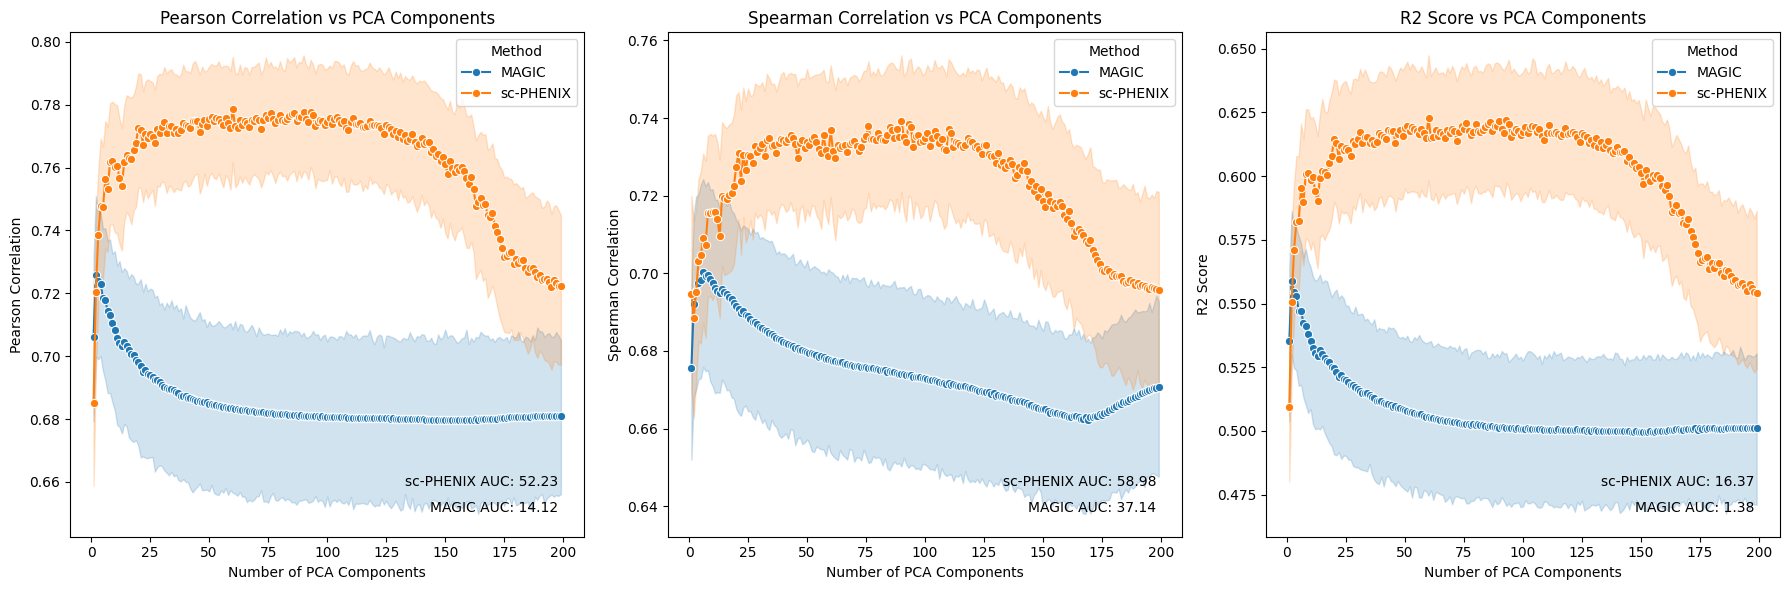

In [5]:
import pandas as pd
import numpy as np
import magic
import umap
from sc_PHENIX import run_pca, sc_PHENIX
from scipy.stats import spearmanr
from sklearn.metrics import auc
from tqdm import tqdm  # Añadir barra de progreso
import matplotlib.pyplot as plt
import seaborn as sns

def run_analysis(real=None, porcentaje=80, seed=62, t=5, knn=5, decay=5, npca_range=range(190, 200)):
    np.random.seed(seed)

    # Asumiendo que `insertar_ceros_aleatorios` es una función definida para introducir dropout
    dropout = insertar_ceros_aleatorios(real, porcentaje=porcentaje, semilla=seed)
    real = real.to_numpy()  # Convertir el DataFrame de pandas a un array de numpy si aún no lo es

    # DataFrame para almacenar los resultados
    results = pd.DataFrame(columns=['Method', 'Parameter', 'Value', 'Pearson', 'Spearman', 'R2'])

    for param_value in tqdm(npca_range, desc='Processing PCA Components'):
        # Configurar y aplicar MAGIC
        magic_operator = magic.MAGIC(n_pca=param_value, t=t, knn=knn, decay=decay, random_state=1)
        imputed_magic = magic_operator.fit_transform(dropout)

        # Calcular métricas para MAGIC
        new_rows = []
        for i in range(imputed_magic.shape[0]):  # Asumiendo que imputed_magic es un DataFrame
            real_sample = real[i, :]
            imputed_sample = imputed_magic.iloc[i, :].to_numpy()  # Convertir la fila del DataFrame a numpy
            pearson = np.corrcoef(real_sample, imputed_sample)[0, 1]
            spearman = spearmanr(real_sample, imputed_sample).correlation
            r2 = pearson**2
            new_rows.append({'Method': 'MAGIC', 'Parameter': 'n_pca', 'Value': param_value, 'Pearson': pearson, 'Spearman': spearman, 'R2': r2})

        results = pd.concat([results, pd.DataFrame(new_rows)], ignore_index=True)

        # Configurar y aplicar sc-PHENIX
        pca_data = run_pca(dropout, n_components=param_value, random_state=1)
        umap_fit = umap.UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, metric='cosine', random_state=1)
        u_no_3 = umap_fit.fit_transform(pca_data)
        imputed_phenix = sc_PHENIX(dropout, u_no_3, t=t, knn=knn, decay=decay)

        # Calcular métricas para sc-PHENIX
        new_rows = []
        for i in range(imputed_phenix.shape[0]):  # Asumiendo que imputed_phenix es un DataFrame
            real_sample = real[i, :]
            imputed_sample = imputed_phenix.iloc[i, :].to_numpy()  # Convertir la fila del DataFrame a numpy
            pearson = np.corrcoef(real_sample, imputed_sample)[0, 1]
            spearman = spearmanr(real_sample, imputed_sample).correlation
            r2 = pearson**2
            new_rows.append({'Method': 'sc-PHENIX', 'Parameter': 'n_pca', 'Value': param_value, 'Pearson': pearson, 'Spearman': spearman, 'R2': r2})

        results = pd.concat([results, pd.DataFrame(new_rows)], ignore_index=True)

    # Construyendo el nombre del archivo basado en todos los argumentos
    filename = f"analysis_results_t{t}_k{knn}_d{decay}_seed{seed}_por{porcentaje}_npca{npca_range.start}-{npca_range.stop-1}.xlsx"
    results.to_excel(filename, index=False)
    print(f"Results saved to {filename}")

    return results

# Ejemplo de uso de la función con datos simulados
results = run_analysis(real=TrueEXpre, porcentaje=80, seed=62, t=5, knn=30, decay=5, npca_range=range(1, 200)) #<<------ parametros
print(results.head())

# Función para calcular el área bajo la curva
def calculate_auc(results, metric):
    methods = results['Method'].unique()
    auc_values = {}
    for method in methods:
        method_data = results[results['Method'] == method]
        x = method_data['Value']
        y = method_data[metric]
        auc_values[method] = auc(x, y)
    return auc_values

# Calcular AUC para cada métrica
auc_pearson = calculate_auc(results, 'Pearson')
auc_spearman = calculate_auc(results, 'Spearman')
auc_r2 = calculate_auc(results, 'R2')

# Mostrar los resultados en el gráfico
plt.figure(figsize=(18, 6))

# Subplot for Pearson correlation
plt.subplot(1, 3, 1)
sns.lineplot(data=results, x='Value', y='Pearson', hue='Method', marker='o')
plt.title('Pearson Correlation vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Pearson Correlation')
for i, (method, auc_value) in enumerate(auc_pearson.items()):
    plt.text(0.95, 0.05 + i*0.05, f'{method} AUC: {auc_value:.2f}', ha='right', transform=plt.gca().transAxes)

# Subplot for Spearman correlation
plt.subplot(1, 3, 2)
sns.lineplot(data=results, x='Value', y='Spearman', hue='Method', marker='o')
plt.title('Spearman Correlation vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Spearman Correlation')
for i, (method, auc_value) in enumerate(auc_spearman.items()):
    plt.text(0.95, 0.05 + i*0.05, f'{method} AUC: {auc_value:.2f}', ha='right', transform=plt.gca().transAxes)

# Subplot for R2 Score
plt.subplot(1, 3, 3)
sns.lineplot(data=results, x='Value', y='R2', hue='Method', marker='o')
plt.title('R2 Score vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('R2 Score')
for i, (method, auc_value) in enumerate(auc_r2.items()):
    plt.text(0.95, 0.05 + i*0.05, f'{method} AUC: {auc_value:.2f}', ha='right', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


<ipython-input-12-92e24b22b44f>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results_new, x='Value', y='Pearson', hue='Method', marker='o', estimator='mean', ci=95)
<ipython-input-12-92e24b22b44f>:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results_new, x='Value', y='Spearman', hue='Method', marker='o', estimator='mean', ci=95)
<ipython-input-12-92e24b22b44f>:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results_new, x='Value', y='R2', hue='Method', marker='o', estimator='mean', ci=95)


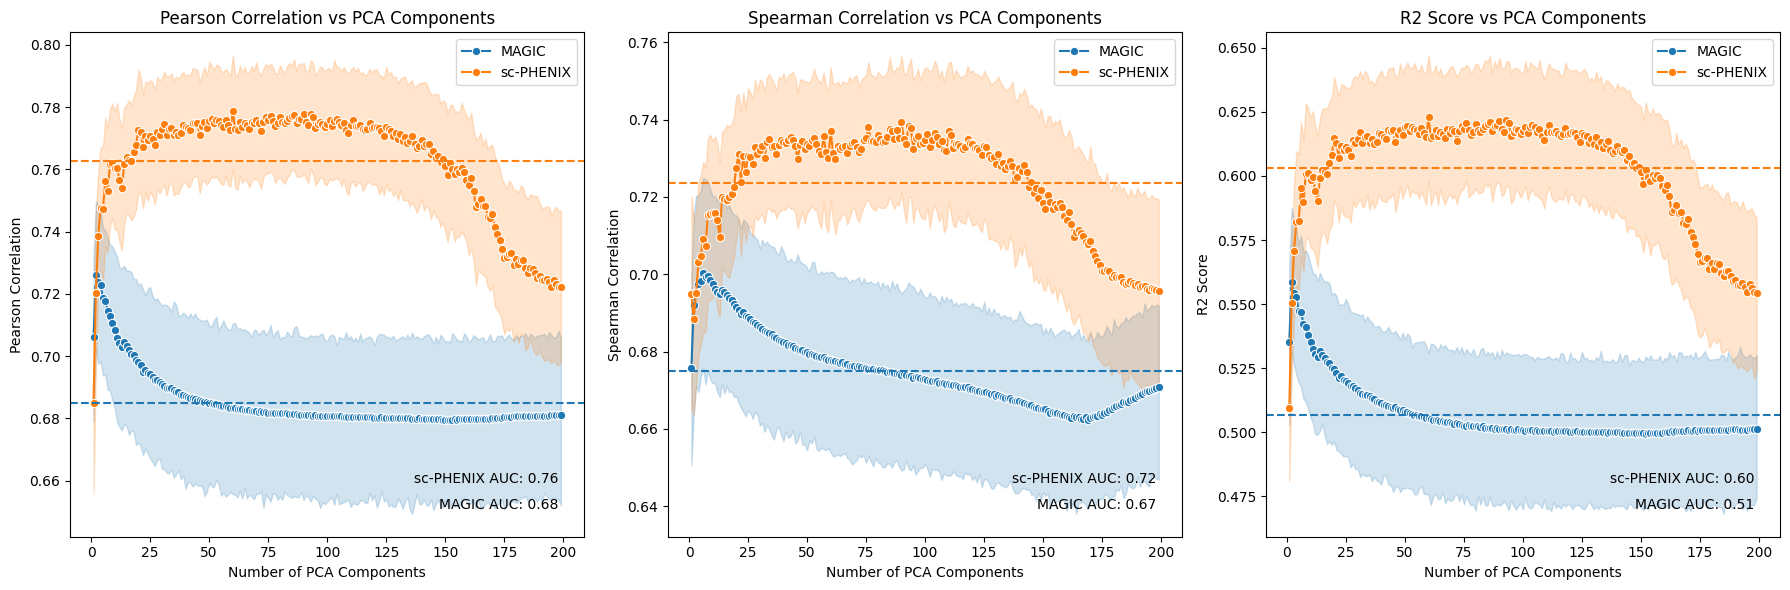

In [12]:
results_new = results.copy()


# Calculate the mean for each metric
mean_pearson = results_new.groupby('Method')['Pearson'].mean()
mean_spearman = results_new.groupby('Method')['Spearman'].mean()
mean_r2 = results_new.groupby('Method')['R2'].mean()


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Function to calculate and normalize AUC for the mean values of each method and plot the area under the curve
# with PCA components scaled to [0, 1] on the x-axis but keeping the original x-axis labels using seaborn
def calculate_auc_scaled(results):
    metrics = ['Pearson', 'Spearman', 'R2']
    auc_values = {metric: {} for metric in metrics}
    for metric in metrics:
        for method in results['Method'].unique():
            method_data = results[results['Method'] == method]
            mean_values = method_data.groupby('Value')[metric].mean()
            original_x = mean_values.index.values.astype(float)
            y = mean_values.values.astype(float)

            # Normalize x values to [0, 1]
            x_normalized = (original_x - original_x.min()) / (original_x.max() - original_x.min())

            # y values are already normalized
            y_normalized = y

            # Calculate AUC
            auc_value = auc(x_normalized, y_normalized)
            auc_values[metric][method] = auc_value
    return auc_values

# Calculate AUC for each metric over the full range using the scaled method
scaled_auc_values = calculate_auc_scaled(results_new)

# Calculate mean values for the methods to use in the legend
mean_pearson = results_new.groupby('Method')['Pearson'].mean()
mean_spearman = results_new.groupby('Method')['Spearman'].mean()
mean_r2 = results_new.groupby('Method')['R2'].mean()

# Plot the original visualization with the scaled AUC values and the adjusted legend
plt.figure(figsize=(18, 6))

# Subplot for Pearson correlation
plt.subplot(1, 3, 1)
sns.lineplot(data=results_new, x='Value', y='Pearson', hue='Method', marker='o', estimator='mean', ci=95)
plt.title('Pearson Correlation vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Pearson Correlation')
for i, (method, auc_value) in enumerate(scaled_auc_values['Pearson'].items()):
    plt.text(0.95, 0.05 + i * 0.05, f'{method} AUC: {auc_value:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add mean lines without adding to legend
for method in mean_pearson.index:
    plt.axhline(mean_pearson[method], linestyle='--', color=sns.color_palette()[0 if method == 'MAGIC' else 1], label=f'{method} Mean')
# Manually adjust the legend to not include the mean lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_handles = [by_label[label] for label in by_label if 'Mean' not in label]
new_labels = [label for label in by_label if 'Mean' not in label]
plt.legend(new_handles, new_labels)

# Subplot for Spearman correlation
plt.subplot(1, 3, 2)
sns.lineplot(data=results_new, x='Value', y='Spearman', hue='Method', marker='o', estimator='mean', ci=95)
plt.title('Spearman Correlation vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Spearman Correlation')
for i, (method, auc_value) in enumerate(scaled_auc_values['Spearman'].items()):
    plt.text(0.95, 0.05 + i * 0.05, f'{method} AUC: {auc_value:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add mean lines without adding to legend
for method in mean_spearman.index:
    plt.axhline(mean_spearman[method], linestyle='--', color=sns.color_palette()[0 if method == 'MAGIC' else 1], label=f'{method} Mean')
# Manually adjust the legend to not include the mean lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_handles = [by_label[label] for label in by_label if 'Mean' not in label]
new_labels = [label for label in by_label if 'Mean' not in label]
plt.legend(new_handles, new_labels)

# Subplot for R2 Score
plt.subplot(1, 3, 3)
sns.lineplot(data=results_new, x='Value', y='R2', hue='Method', marker='o', estimator='mean', ci=95)
plt.title('R2 Score vs PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('R2 Score')
for i, (method, auc_value) in enumerate(scaled_auc_values['R2'].items()):
    plt.text(0.95, 0.05 + i * 0.05, f'{method} AUC: {auc_value:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add mean lines without adding to legend
for method in mean_r2.index:
    plt.axhline(mean_r2[method], linestyle='--', color=sns.color_palette()[0 if method == 'MAGIC' else 1], label=f'{method} Mean')
# Manually adjust the legend to not include the mean lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_handles = [by_label[label] for label in by_label if 'Mean' not in label]
new_labels = [label for label in by_label if 'Mean' not in label]
plt.legend(new_handles, new_labels)

plt.tight_layout()
plt.show()

